## Mutation and p-distance

Imagine a DNA sequence in an ancient ancestral species. With generations, the DNA sequence has accumulated mutations on it. This will drive changes in the phenotype and may eventually give rise to speciation.

In [147]:
from Bio import Seq
import random

In [148]:
bases = ("A", "T", "G", "C")
def hamming_distance(s1, s2):
    if len(s1) != len(s2):
        raise ValueError("Strand lengths are not equal!")
    return sum(ch1 != ch2 for ch1,ch2 in zip(s1,s2))

**Generate a random DNA sequence of length 100 bases**

In [161]:
sequence = "".join(random.choices(bases, k=100))
sequence = Seq.MutableSeq(sequence)
orig_sequence = sequence[:]
len_sequence = len(orig_sequence)

**We have defined `hamming_distance()` which returns the distance between two sequences**
We are assuming changing the base at the position to anything else than what it was in the ancestral species will increase the hamming distance. The ancestral DNA sequence is our reference.

It is to be noted that reversals will decrease the distance. The generations parameter can be changed to increase or decrease the time period of the observations

In [162]:
y_pdist = []
x_generation = []

generations = 1000

for gen in range(generations):
    pos = random.choice(range(len_sequence))
    ###regardless of position of the gene
#     sequence[pos] = random.choice(bases)
    ###only allow mutation when the base is at wobble position / assuming the third position is always silent mut
    if pos%3 == 0:  
        sequence[pos] = random.choice(bases)
    x_generation.append(gen)
    y_pdist.append(hamming_distance(orig_sequence, sequence)/len_sequence)
    

In [163]:
from matplotlib import pyplot as plt

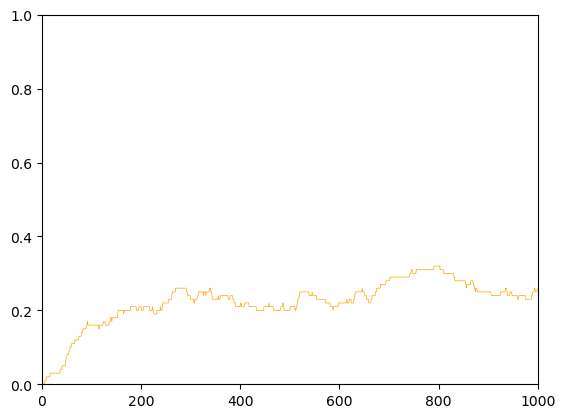

In [165]:
plt.plot(x_generation, y_pdist, color="orange", linewidth=0.5)
plt.ylim(0, 1)
plt.xlim(0, generations)
plt.show()

The hamming distance or p-distance saturates at 25%